In [95]:

!pip install pandas


In [96]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv("dataset.csv")  # Update with your actual file path


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset.csv")  # Replace with your actual path if needed

# Display all column names
print("Column names in the dataset:\n")
for col in df.columns:
    print(col)


Column names in the dataset:

country
year
iso_code
population
gdp
cement_co2
cement_co2_per_capita
co2
co2_growth_abs
co2_growth_prct
co2_including_luc
co2_including_luc_growth_abs
co2_including_luc_growth_prct
co2_including_luc_per_capita
co2_including_luc_per_gdp
co2_including_luc_per_unit_energy
co2_per_capita
co2_per_gdp
co2_per_unit_energy
coal_co2
coal_co2_per_capita
consumption_co2
consumption_co2_per_capita
consumption_co2_per_gdp
cumulative_cement_co2
cumulative_co2
cumulative_co2_including_luc
cumulative_coal_co2
cumulative_flaring_co2
cumulative_gas_co2
cumulative_luc_co2
cumulative_oil_co2
cumulative_other_co2
energy_per_capita
energy_per_gdp
flaring_co2
flaring_co2_per_capita
gas_co2
gas_co2_per_capita
ghg_excluding_lucf_per_capita
ghg_per_capita
land_use_change_co2
land_use_change_co2_per_capita
methane
methane_per_capita
nitrous_oxide
nitrous_oxide_per_capita
oil_co2
oil_co2_per_capita
other_co2_per_capita
other_industry_co2
primary_energy_consumption
share_global_cemen

In [9]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Load your dataset
df = pd.read_csv("dataset.csv")  # Replace with your actual path

# Step 2: Encode categorical columns
label_encoder = LabelEncoder()
for col in ['country', 'iso_code']:
    df[col] = df[col].astype(str)  # Ensure they are string type
    df[col] = label_encoder.fit_transform(df[col])

# Step 3: Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 4: Scale numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Step 5: Show the transformed dataset (first 5 rows)
print(df.head())


   country      year  iso_code  population  gdp  cement_co2  \
0      0.0  0.000000  0.004587    0.000346  NaN         0.0   
1      0.0  0.003663  0.004587         NaN  NaN         0.0   
2      0.0  0.007326  0.004587         NaN  NaN         0.0   
3      0.0  0.010989  0.004587         NaN  NaN         0.0   
4      0.0  0.014652  0.004587         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   

In [101]:
import pandas as pd

# Load dataset (if not already loaded)
df = pd.read_csv("dataset.csv")

# Optional: encode and scale if not already done
# (skip if already done in earlier steps)

# Generate descriptive statistics
desc_stats = df.describe()

# Display the result
print(desc_stats)


               year    population           gdp    cement_co2  \
count  50191.000000  4.101900e+04  1.525100e+04  28863.000000   
mean    1919.883067  5.686141e+07  3.300495e+11      7.767746   
std       65.627296  3.199905e+08  3.086383e+12     62.595292   
min     1750.000000  2.150000e+02  4.998000e+07      0.000000   
25%     1875.000000  3.273130e+05  7.874038e+09      0.000000   
50%     1924.000000  2.289522e+06  2.743861e+10      0.000000   
75%     1974.000000  9.862459e+06  1.212625e+11      0.486000   
max     2023.000000  8.091735e+09  1.301126e+14   1696.308000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           25358.000000  29137.000000    26981.000000     26002.000000   
mean                0.059036    415.698178        6.208882        43.104462   
std                 0.120328   1945.843973       62.322553      1729.939596   
min                 0.000000      0.000000    -1977.750000      -100.000000   
25%                

In [102]:
!pip install seaborn


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


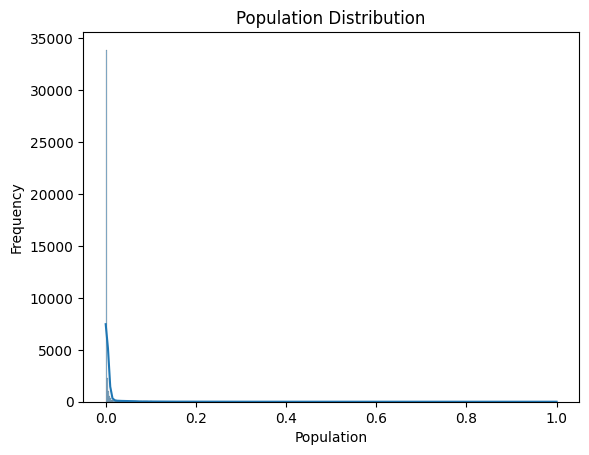

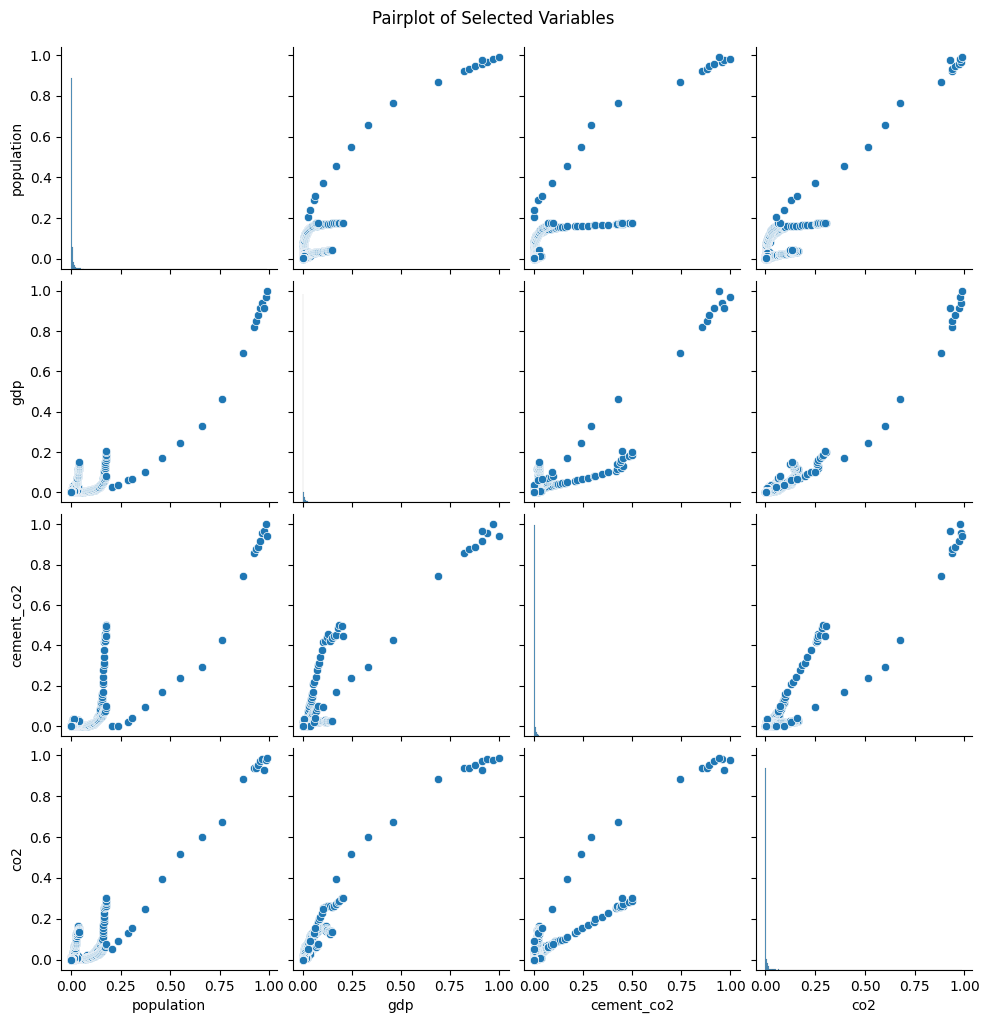

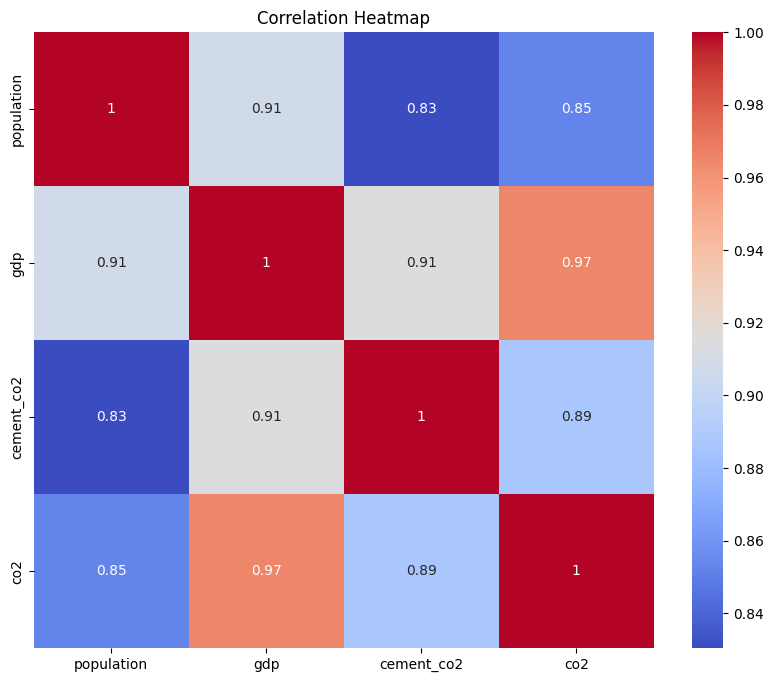

In [12]:
# Visualize distributions and relationships

# 1. Distribution of a key variable (e.g., population)
sns.histplot(df['population'].dropna(), kde=True)
plt.title('Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

# 2. Pairplot for selected numeric columns (change columns as needed)
selected_cols = ['population', 'gdp', 'cement_co2', 'co2']
sns.pairplot(df[selected_cols].dropna())
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

# 3. Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
corr = df[selected_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Select features for clustering
features = ['population', 'gdp', 'cement_co2', 'co2']
X = df[features].dropna()

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.cluster import KMeans

# Train the KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to each row
X['cluster'] = kmeans.labels_

# Show the first few rows with cluster labels
print(X.head())

     population       gdp  cement_co2       co2  cluster
200    0.000961  0.000072         0.0  0.000002        0
201    0.000974  0.000074         0.0  0.000002        0
202    0.000987  0.000077         0.0  0.000002        0
203    0.001001  0.000081         0.0  0.000003        0
204    0.001014  0.000083         0.0  0.000003        0


In [16]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering using silhouette score
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.977


In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def select_features(df, features):
    return df[features].dropna()

def scale_features(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

def train_kmeans(X_scaled, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    return kmeans 

def evaluate_clustering(X_scaled, labels):
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.3f}")
    return score

In [18]:
# Load your dataset
df = pd.read_csv("dataset.csv")

# Select features for clustering
features = ['population', 'gdp', 'cement_co2', 'co2']
X = select_features(df, features)

In [19]:
X_scaled, scaler = scale_features(X)

In [20]:
kmeans = train_kmeans(X_scaled, n_clusters=3)

In [21]:
X['cluster'] = kmeans.labels_
evaluate_clustering(X_scaled, kmeans.labels_)
print(X.head())

Silhouette Score: 0.977
     population           gdp  cement_co2    co2  cluster
200   7776182.0  9.421400e+09         0.0  0.084        0
201   7879343.0  9.692280e+09         0.0  0.092        0
202   7987783.0  1.001733e+10         0.0  0.092        0
203   8096703.0  1.063052e+10         0.0  0.106        0
204   8207953.0  1.086636e+10         0.0  0.106        0


In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to select relevant features
def select_features(df, features):
    return df[features].dropna()

# Function to scale features
def scale_features(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Function to train KMeans model
def train_kmeans(X_scaled, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    return kmeans

# Function to evaluate clustering
def evaluate_clustering(X_scaled, labels):
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.3f}")
    return score

In [23]:
# Load your dataset
df = pd.read_csv("dataset.csv")

In [118]:
# Select features for clustering
features = ['population', 'gdp', 'cement_co2', 'co2']
X = select_features(df, features)

In [26]:
# Scale the selected features
X_scaled, scaler = scale_features(X)

In [25]:
# Train the KMeans clustering model
kmeans = train_kmeans(X_scaled, n_clusters=3)

In [24]:
# Assign cluster labels to each row
X['cluster'] = kmeans.labels_

# Evaluate clustering with silhouette score
evaluate_clustering(X_scaled, kmeans.labels_)

# Show the first few rows with cluster labels
print(X.head())

Silhouette Score: 0.977
     population           gdp  cement_co2    co2  cluster
200   7776182.0  9.421400e+09         0.0  0.084        0
201   7879343.0  9.692280e+09         0.0  0.092        0
202   7987783.0  1.001733e+10         0.0  0.092        0
203   8096703.0  1.063052e+10         0.0  0.106        0
204   8207953.0  1.086636e+10         0.0  0.106        0


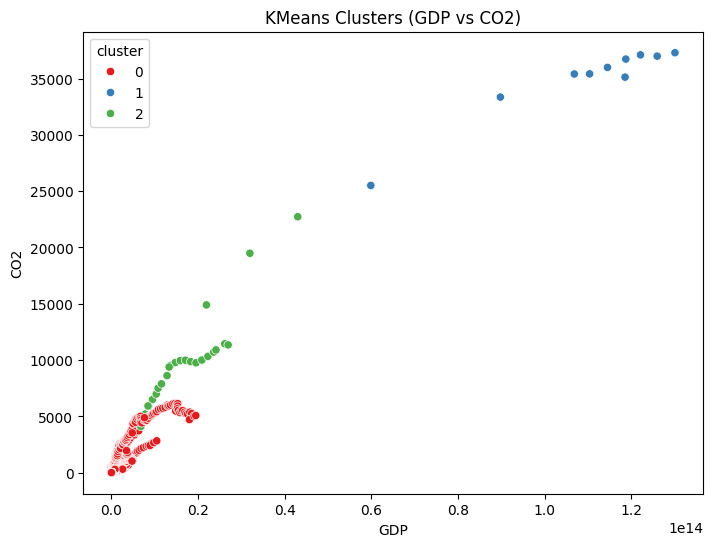

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters using two features (e.g., gdp vs co2)
plt.figure(figsize=(8,6))
sns.scatterplot(data=X, x='gdp', y='co2', hue='cluster', palette='Set1')
plt.title('KMeans Clusters (GDP vs CO2)')
plt.xlabel('GDP')
plt.ylabel('CO2')
plt.show()

In [27]:
import numpy as np

def find_best_k(X_scaled, k_range=(2, 10)):
    """
    Finds the best number of clusters for KMeans using silhouette score.
    Returns the best k and a plot of silhouette scores.
    """
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    import matplotlib.pyplot as plt

    scores = []
    ks = range(k_range[0], k_range[1]+1)
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        scores.append(score)
        print(f"k={k}, silhouette score={score:.3f}")

    best_k = ks[np.argmax(scores)]
    print(f"\nBest k by silhouette score: {best_k}")

    plt.plot(ks, scores, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs. Number of Clusters")
    plt.show()
    return best_k

k=2, silhouette score=0.990
k=3, silhouette score=0.990
k=4, silhouette score=0.940
k=5, silhouette score=0.939
k=6, silhouette score=0.939
k=7, silhouette score=0.899
k=8, silhouette score=0.825

Best k by silhouette score: 2


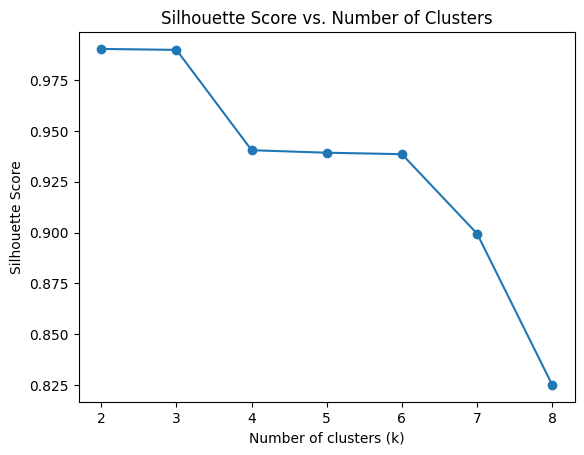

Silhouette Score: 0.990


0.9902954584133723

In [28]:
# Find the best number of clusters for your data
best_k = find_best_k(X_scaled, k_range=(2, 8))

# Train KMeans with the best k
kmeans = train_kmeans(X_scaled, n_clusters=best_k)
X['cluster'] = kmeans.labels_
evaluate_clustering(X_scaled, kmeans.labels_)

In [29]:
print(df.isnull().sum())

country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64


In [30]:
df.dropna(inplace=True)  

df.dropna(subset=['iso_code'], inplace=True)

In [31]:
print(df.isnull().sum())

country                        0
year                           0
iso_code                       0
population                     0
gdp                            0
                              ..
temperature_change_from_n2o    0
total_ghg                      0
total_ghg_excluding_lucf       0
trade_co2                      0
trade_co2_share                0
Length: 79, dtype: int64


In [32]:
df.to_csv('Global_cleaned.csv', index=False)
print(" File 'Globaal_cleaned.csv' saved successfully.")

 File 'Globaal_cleaned.csv' saved successfully.
